In [29]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy.cluster.hierarchy as sch
import scipy.stats as stats
from scipy.stats import zscore
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import pingouin as pg
import plotly.express as px 
import plotly.io as pio
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Numpy version:", np.__version__)
print("Sklearn version:", sklearn.__version__)

Pandas version: 2.2.2
Matplotlib version: 3.8.4
Numpy version: 1.26.4
Sklearn version: 1.4.2


In [3]:
#Reading the data
df = pd.read_csv(r"C:\Users\vitor\Documentos\Kaggle\Smartphones DS\smartphone_cleaned_v5.csv")

In [4]:
#Checking the variables and some of the observations
pd.set_option('display.max_columns', None)
df.head(5)

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


In [7]:
#Getting some descriptions of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

<b>Idea:</b> Create groups based on numeric values from the table. <br>
<b>Proccess:</b> Two methods - hierarchical clustering and k-means. After both implementation, comparision to check which is more applicable. <br>
<b>Outcome:</b> Create groups to assist vendors of tech products to determine and predict which will be the most selled smartphones. This analysis can help during the buying, stocking and marketing

In [8]:
#Removing all the observations based on the missing values from Rating column

df.dropna(subset=['rating'], how='all', inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 879 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 879 non-null    object 
 1   model                      879 non-null    object 
 2   price                      879 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     879 non-null    bool   
 5   has_nfc                    879 non-null    bool   
 6   has_ir_blaster             879 non-null    bool   
 7   processor_brand            862 non-null    object 
 8   num_cores                  873 non-null    float64
 9   processor_speed            840 non-null    float64
 10  battery_capacity           869 non-null    float64
 11  fast_charging_available    879 non-null    int64  
 12  fast_charging              705 non-null    float64
 13  ram_capacity               879 non-null    float64
 14 

It is possible to confirm the new results, now the number of observations are 879, there were 101 Null Values on Rating column 

3d plot based on camera values


Text(0, 0.5, 'Rating')

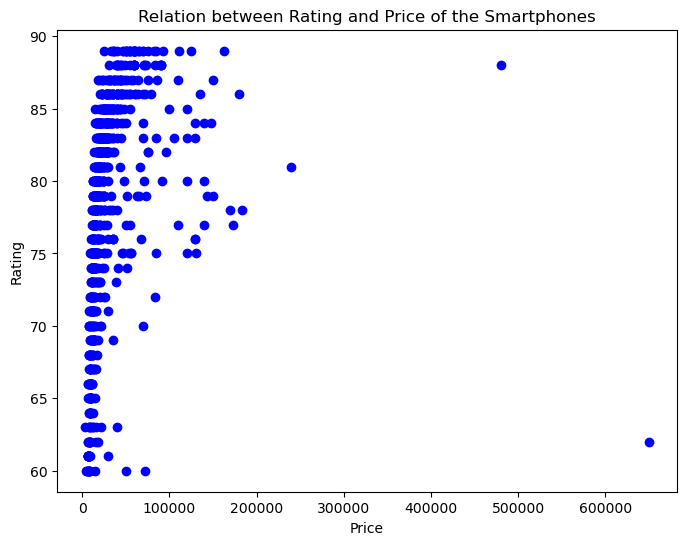

In [10]:
#Creating a scatterplot using varibales Reviews and Installs
plt.figure(figsize=(8,6))
plt.scatter(df['price'], df['rating'], color='blue', marker='o')

plt.title('Relation between Rating and Price of the Smartphones')
plt.xlabel('Price')
plt.ylabel('Rating')


Based on the information given by the creator of the tables, the values available on the price are in Indian National Rupples. Let's convert it to US Dollar so it can be easy for more audiences to interpret. <br>

1 Dollar = 83,90 Indian National Rupples - Based on values for Date: August, 12 2024

In [11]:
#convert the value 
df['price'] = df['price'].div(83.9).round(2)

df['price'].describe()

count     879.000000
mean      354.148749
std       445.019719
min        41.700000
25%       160.890000
50%       238.260000
75%       381.360000
max      7747.320000
Name: price, dtype: float64

There are 3 outliers on this table for the price column

In [12]:
#Creating a new dataframe and sorting descending to check which are the outliers
price_desc = df.sort_values(['price'], ascending=[False])

price_desc.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
427,vertu,Vertu Signature Touch,7747.32,62.0,False,True,False,snapdragon,8.0,1.50,...,4.70,60,1080 x 1920,1,1.0,android,13.0,2.1,0,NaN
887,xiaomi,Xiaomi Redmi K20 Pro Signature Edition,5721.10,88.0,False,True,False,snapdragon,8.0,2.80,...,6.39,60,1080 x 2340,3,1.0,android,48.0,20.0,0,NaN
478,huawei,Huawei Mate 50 RS Porsche Design,2860.54,81.0,False,True,True,snapdragon,8.0,3.20,...,6.74,120,1212 x 2616,3,1.0,other,50.0,13.0,1,256.0
288,apple,Apple iPhone 14 Pro Max (1TB),2181.16,78.0,True,True,False,bionic,6.0,NaN,...,6.70,120,1290 x 2796,3,1.0,ios,48.0,12.0,0,NaN
756,apple,Apple iPhone 13 Pro Max (1TB),2144.22,86.0,True,True,False,bionic,6.0,3.22,...,6.70,120,1284 x 2778,3,1.0,ios,12.0,12.0,0,NaN


In [14]:
#Removing the outliers from the original table
df = df[~df['price'].isin([7747.32, 5721.10, 2860.54])]


In [15]:
#Checking now the information about the rating column after the outliers removal
df['rating'].describe()

count    876.000000
mean      78.262557
std        7.387218
min       60.000000
25%       74.000000
50%       80.000000
75%       84.000000
max       89.000000
Name: rating, dtype: float64

Text(0, 0.5, 'Rating')

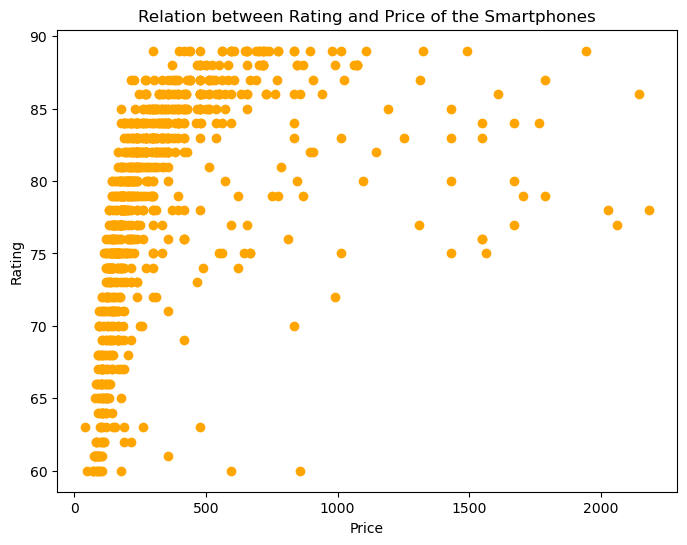

In [16]:
#Creating a scatterplot using varibales Reviews and Installs

plt.figure(figsize=(8,6))
plt.scatter(df['price'], df['rating'], color='orange', marker='o')

plt.title('Relation between Rating and Price of the Smartphones')
plt.xlabel('Price')
plt.ylabel('Rating')

With the scatterplot created, it is possible to observe that there are more agruppated observations than the less dispersed observations, but there is variation when the prices of smartphones exceed 1000 dollars. In this case, the 'complete' method is more appropriate as it considers the greatest distances between the variables

In [248]:
#creating a dataframe containing only the metrics variables
price_rate = df[['price','rating']]

In [249]:
#Applying Z-Score to put the variables at the same level
price_rate = price_rate.apply(zscore, ddof=1)

#Checking the results of ZScore
print(round(price_rate.mean(), 2))
print(round(price_rate.std(), 2))

price     0.0
rating   -0.0
dtype: float64
price     1.0
rating    1.0
dtype: float64


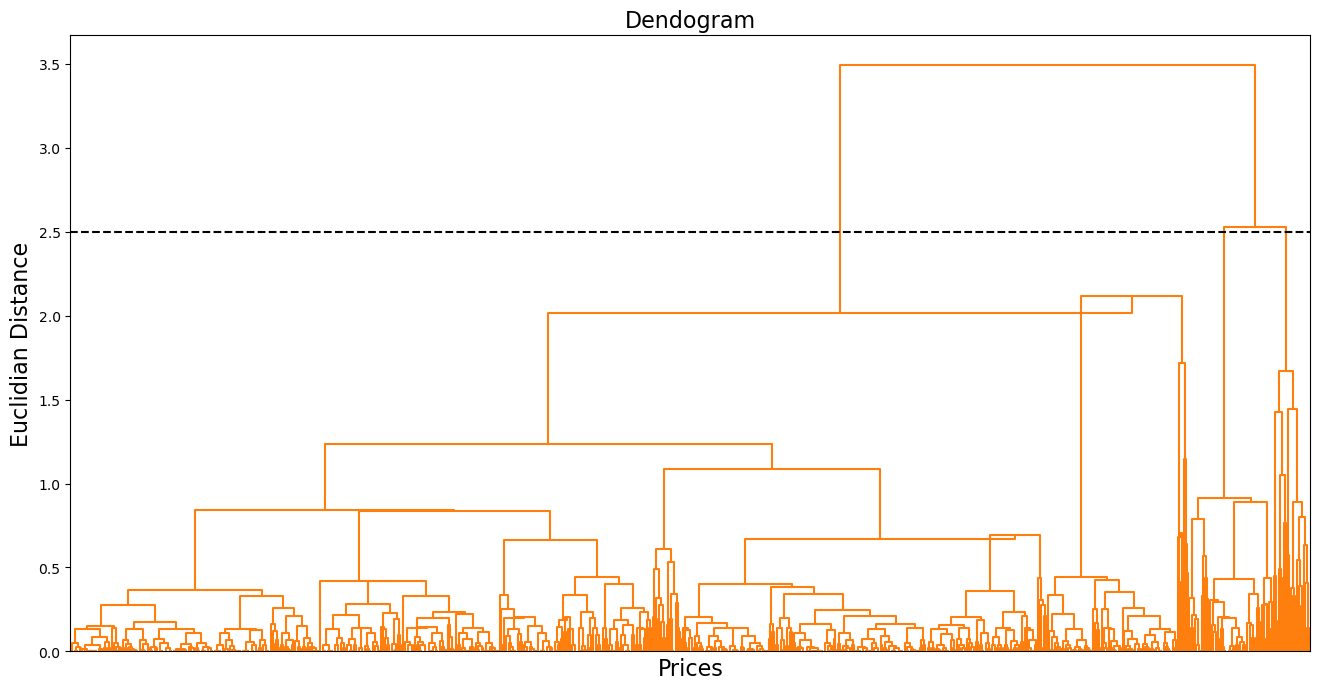

In [250]:
#Creating the Dendogram
plt.figure(figsize=(16,8))
dend_sing_euc = sch.linkage(price_rate, method = 'median', metric = 'euclidean')
dendrogram_euc = sch.dendrogram(dend_sing_euc, color_threshold = 55, labels = list(price_rate.price))
plt.title('Dendogram', fontsize=16)
plt.xticks([])
plt.xlabel('Prices', fontsize=16)
plt.ylabel('Euclidian Distance', fontsize=16)
plt.axhline(y = 2.5, color = 'black', linestyle = '--')
plt.show()

To avoid significant distance jumps in the analysis, I choose to keep it to 3 groups

In [257]:
#Adding the new column on the original dataframe
creating_cluster = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'complete')
indica_cluster_comp = creating_cluster.fit_predict(price_rate)
df['cluster_average'] = indica_cluster_comp
df['cluster_average'] = df['cluster_average'].astype('category')

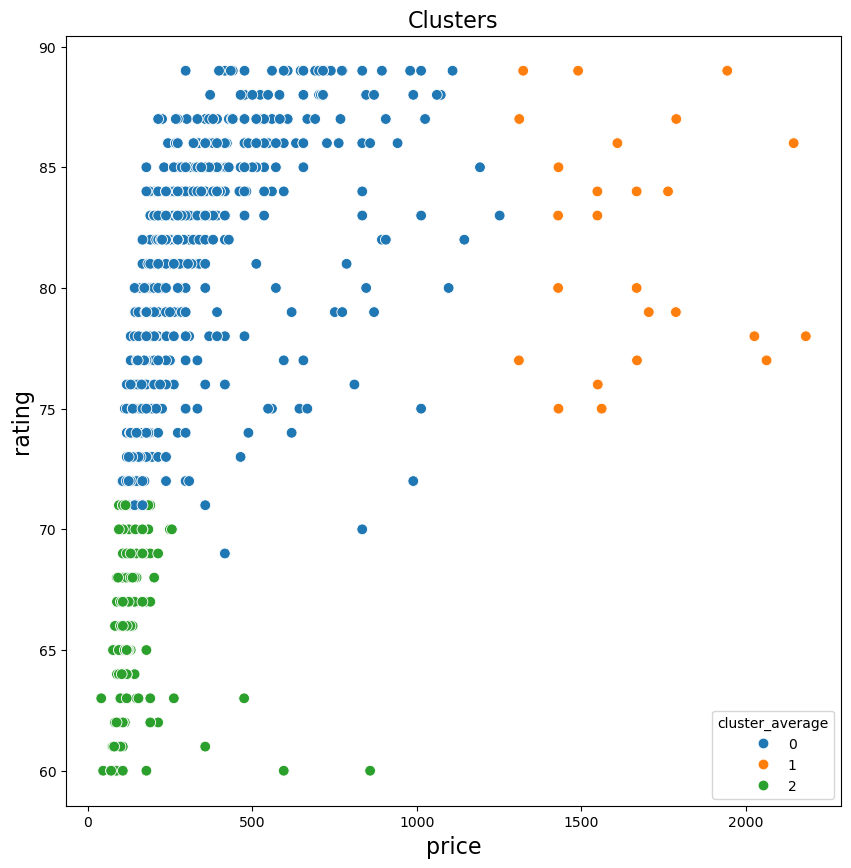

In [258]:
#printing the Scatter Plot to see the clusters.
plt.figure(figsize=(10,10))
fig = sns.scatterplot(x='price', y='rating', s=60, data=df, hue='cluster_average')
plt.title('Clusters', fontsize=16)
plt.xlabel('price', fontsize=16)
plt.ylabel('rating', fontsize=16)
plt.show()

With the model completed, we can determine:
- Cluster with value 0 -  blue - indicate smartphones that can be considered "Cost-Benefit". Good price and rate above the average.
- Cluster with value 1 - orange - indicate smartphones more expensive but with only with rates above the average. Probablly more advanced phones.
- Cluster with value 2 - green - indicate smartphones with rates minor than the median and with lower cost. Probably more simple and entry models.

This analysis can assist the retailer in determining the quantity of products that will be sold, helping them understand their business. It can also highlight how much they will need to invest in purchasing the appropriate models for their enterprise

After checking with the owner of the dataset, there is not source about the rating column, so the points are not based in any real analysis. What I'll do is to create a new rating column based in my own evaluation.

For Smartphones, there are some characteristis which indicates that can evaluate and can increase the ratings:
- Batter Cappacity
- Processor Speed
- If fast charging is available
- Ram capacity
- Internal storage
- Refresh Rate
- Resolution
- Number of back cameras
- Number of front cameras


These details are available on the dataset as below:

In [6]:
pd.set_option('display.max_columns', None)
df.head(5)

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


In [215]:
#Checking details for column Batter Capacity:
df['battery_capacity'].describe()


count      980.000000
mean      4763.671429
std       1124.983036
min          0.000000
25%       4500.000000
50%       5000.000000
75%       5000.000000
max      22000.000000
Name: battery_capacity, dtype: float64

In [216]:
df['battery_capacity'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 980 entries, 0 to 979
Series name: battery_capacity
Non-Null Count  Dtype  
--------------  -----  
980 non-null    float64
dtypes: float64(1)
memory usage: 7.8 KB


In [217]:
print("Number of null values:", df['battery_capacity'].isna().sum())

Number of null values: 0


In [218]:
#Replacing NA to zero
df['battery_capacity'].fillna(0, inplace=True)

In [219]:
print("Number of null values:", df['battery_capacity'].isna().sum())

Number of null values: 0


For the Batter Capacity, I'll consider 4 levels.

In [220]:
#Creating the 4 levels of range:
levels_range_battery = [(0, 2500), (2500, 5000), (5000, 7500), (7500, np.infty)]
ranges = pd.IntervalIndex.from_tuples(levels_range_battery, closed = 'left')
battery_capacity_levels = pd.cut(df['battery_capacity'], bins=ranges)
battery_rating = pd.DataFrame({
    'battery_capacity': df['battery_capacity'],
    'battery_capacity_levels': battery_capacity_levels
})

In [214]:
battery_rating.head()

,battery_capacity,battery_capacity_levels
0,5000.0,"[5000.0, 7500.0)"
1,5000.0,"[5000.0, 7500.0)"
2,5000.0,"[5000.0, 7500.0)"
3,5000.0,"[5000.0, 7500.0)"
4,5000.0,"[5000.0, 7500.0)"


In [221]:
#Replacing the values to labels
four_levels = ['1', "2", "3", "4"]
battery_rating['battery_capacity_levels'] = battery_rating['battery_capacity_levels'].cat.rename_categories(four_levels)

In [222]:
battery_rating.head()

,battery_capacity,battery_capacity_levels
0,5000.0,3
1,5000.0,3
2,5000.0,3
3,5000.0,3
4,5000.0,3


In [223]:
battery_rating['battery_capacity_levels'].value_counts().sort_index()

battery_capacity_levels
1     20
2    360
3    596
4      4
Name: count, dtype: int64

Now we have 4 levels for the Battery_Capacity.


To improve the code, I'll create three functions for all the columns.
- To replace the NA for zero
- To describe and analyise the column
- To create the levels for the columns

In [224]:
def replace_nans(df, input_column):
    value_of_na = df[input_column].isna().sum()
    if value_of_na > 0:
        df[input_column].fillna(0, inplace=True)
        print("Empty values were replaced")
    else:
        print("There is no empty values on this column")

In [225]:
def analyze_column(df, input_column):
    print(df[input_column].describe())
    print(df[input_column].value_counts().sort_index())

In [226]:
def create_levels(df, intervals, source_column, new_column, four_levels):
    ranges = pd.IntervalIndex.from_tuples(intervals, closed='left')
    df[new_column] = pd.cut(df[source_column], bins=ranges)
    df[new_column] = df[new_column].cat.rename_categories(labels)
    result_df = df[[source_column, new_column]]
    return result_df


Let's evaluate the levels now for Processor Speed column:

In [227]:
#Analyzing the column
analyze_column(df, 'processor_speed')

count    980.000000
mean       2.323194
std        0.669368
min        0.000000
25%        2.000000
50%        2.300000
75%        2.840000
max        3.220000
Name: processor_speed, dtype: float64
processor_speed
0.00     42
1.20      1
1.30     10
1.40      5
1.50      4
1.60     20
1.80     23
1.82     10
1.95      1
1.99      1
2.00    146
2.05     28
2.10      1
2.20    135
2.30     86
2.35      1
2.36      8
2.37      1
2.40    128
2.50     23
2.60     14
2.65      5
2.70      5
2.73      9
2.80      9
2.84     36
2.85     19
2.86      3
2.90     13
2.96      3
3.00     53
3.05      8
3.10     15
3.13      2
3.20     94
3.22     18
Name: count, dtype: int64


In [228]:
#Checking if there is empty values on the processor_speed column:
replace_nans(df, 'processor_speed')

There is no empty values on this column


In [229]:
#creating the range levels for processor_speed based on the analysis
intervals_processor_speed = [(0, 1.2), (1.2, 2.0), (2.0, 2.8), (2.8, np.infty)]

In [230]:
#applying the function for the processor_speed column
rating_processor_speed = create_levels(df, intervals_processor_speed, 'processor_speed', 'processor_speed_levels', four_levels)
rating_processor_speed 

,processor_speed,processor_speed_levels
0,3.20,4
1,2.20,3
2,2.40,3
3,2.20,3
4,2.60,3
...,...,...
975,3.00,4
976,2.20,3
977,2.85,4
978,2.20,3


In [240]:
#Analyzing the ram_capacity column
analyze_column(df, 'ram_capacity')

count    980.000000
mean       6.560204
std        2.744378
min        1.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       18.000000
Name: ram_capacity, dtype: float64
ram_capacity
1.0       7
2.0      32
3.0      54
4.0     217
6.0     234
8.0     339
12.0     86
16.0      9
18.0      2
Name: count, dtype: int64


In [239]:
#applying the functions for ram_capacity column
replace_nans(df, 'ram_capacity')

There is no empty values on this column


In [244]:
#creating the range levels for ram_capacity based on the analysis
intervals_ram_capacity = [(0, 3), (3, 5), (5, np.infty)]
three_levels = ['1', "2", "3"]

In [ ]:
rating_ram_capacity = create_levels(df, intervals_ram_capacity, 'ram_capacity', 'pram_capacity_levels', three_levels)
rating_ram_capacity

In [189]:
#Analyzing the internal storage capacity column
analyze_column(df, 'internal_memory')

count     980.000000
mean      141.036735
std       107.134516
min         8.000000
25%        64.000000
50%       128.000000
75%       128.000000
max      1024.000000
Name: internal_memory, dtype: float64
internal_memory
8.0         1
16.0       12
32.0       67
64.0      193
128.0     523
256.0     157
512.0      22
1024.0      5
Name: count, dtype: int64


In [190]:
#applying the functions for ram_capacity column
replace_nans(df, 'internal_memory')

There is no empty values on this column


In [193]:
#creating the range levels for internal_memory based on the analysis
intervals_internal_memory = [(0, 32), (32, 256), (256, np.infty)]
labels_internal_memory = ['Level_1', "Level_2", "Level_3"]

In [196]:
rating_internal_memory = create_levels(df, intervals_internal_memory, 'internal_memory', 'internal_memory_levels', labels_internal_memory)
rating_internal_memory 

,internal_memory,internal_memory_levels
0,256.0,Level_3
1,128.0,Level_2
2,64.0,Level_2
3,128.0,Level_2
4,128.0,Level_2
...,...,...
975,128.0,Level_2
976,128.0,Level_2
977,256.0,Level_3
978,128.0,Level_2
